
# House sales analyses in northwestern county

# Business problem

BuildKesho consultancy ltd aims to offer personalized advice to homebuyers, helping them understand how different features of a property contribute to its market value. The goal is to create a model that not only predicts house prices effectively but also provides insights into which property features have the most significant impact on the overall valuation. This way, the consultant can enhance its advisory services and guide clients on making sound investment choices in the northwestern county real estate market.

This project seeks to answer the following questions;

1.What is the average pricing of a house?

2.which features greatly affect the house prices?

3.How well does the multiple regression model predict house prices in the northwestern county real estate market?

4.How do changes in each feature correspond to changes in the predicted house price?

5.How does the residual distribution look like,and does it meet the assumptions of linear regression?

## The Data

In [145]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [146]:
# Loading the dataset
data= pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data cleaning and analysis

In [147]:
#indentifying the  data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [148]:
# dropping the columns that will not used for modelling and analysis
data1 = data.drop(columns = ['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis =1)
data1


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [149]:
# chaking for the null values in the remaining columns
data1.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [150]:
# droping the null values from the waterfront column and checking the data types on each column
data1.dropna(inplace = True)
data1.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront      object
condition       object
grade           object
yr_built         int64
dtype: object

In [151]:
# sample of the dataset 
data1.sample(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1812,3125079062,589000.0,3,2.5,2660,206480,1.0,NO,Average,8 Good,1989
1461,9550200310,495000.0,2,1.0,970,4284,1.0,NO,Average,7 Average,1905
18977,7856400300,1510000.0,2,2.5,3180,9400,2.0,NO,Very Good,10 Very Good,1985
20177,626059127,614000.0,3,2.5,2830,5831,2.0,NO,Average,9 Better,2010
14794,7855000325,1050000.0,4,3.0,3080,10757,2.0,NO,Very Good,8 Good,1961
8673,2523069146,349900.0,3,2.0,2420,38781,1.0,NO,Very Good,7 Average,1949
18370,1771000760,319000.0,3,1.0,1390,12823,1.0,NO,Good,7 Average,1968
14840,8121200620,550000.0,3,2.5,1680,10455,2.0,NO,Average,8 Good,1982
3605,8658303585,252500.0,2,1.0,900,7500,1.0,NO,Good,6 Low Average,1961
3877,8025700590,215000.0,3,1.0,970,7275,1.0,NO,Good,7 Average,1970


In [152]:
# getting the unique values in the condition column
data1['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [153]:
# getting the unique values in the grade column
data1['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [154]:
# checking for duplicates in the data set and dropping them
print(data1.duplicated().sum())
data1.drop_duplicates(inplace = True)

2


In [155]:
# Condition column is an object type and therefore we use hot encoding to convert it to an integer type
# Define a mapping for condition labels
condition_encoding = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}

# Apply the mapping to the 'condition' column
data1['condition_encoded'] = data1['condition'].map(condition_encoding)

# Print the result
print(data1[['condition', 'condition_encoded']])

       condition  condition_encoded
1        Average                  3
2        Average                  3
3      Very Good                  5
4        Average                  3
5        Average                  3
...          ...                ...
21591    Average                  3
21592    Average                  3
21593    Average                  3
21594    Average                  3
21596    Average                  3

[19219 rows x 2 columns]


In [156]:
# perform one hot encoding for the grade column to convert it to numeric data
# Define a mapping for condition labels
grade_encoding = {'3 Poor': 3, '4 low' : 4, '5 Fair': 5,'6 Low Average' : 6, '7 Average': 7, '8 Good': 8,
                  '9 Better': 9 ,'10 Very Good': 10, '11 Excellent' : 11, '12 Luxury' :12 ,'13 Mansion':13}

# Apply the mapping to the 'condition' column
data1['grade_encoded'] = data1['grade'].map(grade_encoding)

# Print the result
print(data1[['grade', 'grade_encoded']])

               grade  grade_encoded
1          7 Average            7.0
2      6 Low Average            6.0
3          7 Average            7.0
4             8 Good            8.0
5       11 Excellent           11.0
...              ...            ...
21591         8 Good            8.0
21592         8 Good            8.0
21593         8 Good            8.0
21594      7 Average            7.0
21596      7 Average            7.0

[19219 rows x 2 columns]


In [157]:
# drop the condition and grade column that are in object type
data1.drop(columns = ['condition','grade'] ,inplace= True)

In [158]:
# perform one hot encoding for the column waterfront to be able to use it as numeric data
# Define a mapping for condition labels
waterfront_encoding = {'NO': 0, 'YES' : 1}

# Apply the mapping to the 'condition' column
data1['waterfront_encoded'] = data1['waterfront'].map(waterfront_encoding)

# Print the result
print(data1[['waterfront', 'waterfront_encoded']])

      waterfront  waterfront_encoded
1             NO                   0
2             NO                   0
3             NO                   0
4             NO                   0
5             NO                   0
...          ...                 ...
21591         NO                   0
21592         NO                   0
21593         NO                   0
21594         NO                   0
21596         NO                   0

[19219 rows x 2 columns]


In [159]:
# summary of the first five rows of the final dataset with all columns being numeric data
data1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,condition_encoded,grade_encoded,waterfront_encoded
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,1951,3,7.0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,1933,3,6.0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,1965,5,7.0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,1987,3,8.0,0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,2001,3,11.0,0


In [160]:
data1.drop('waterfront', axis = 1, inplace = True)

In [161]:
data1.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built', 'condition_encoded', 'grade_encoded',
       'waterfront_encoded'],
      dtype='object')

## Data Modelling and Prediction

In [162]:
# predict 'price' against other independent variables
# Drop 'id' columns


# columns to use as independent variables (X)
independent_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built', 'condition_encoded', 'grade_encoded',
       'waterfront_encoded']

# Assigning independent variables (X) 
X = data1[independent_columns]

# Assigning the dependent variable (y)
y = data1['price']


In [163]:
# getting the data types for the x variable
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 1 to 21596
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            19219 non-null  int64  
 1   bathrooms           19219 non-null  float64
 2   sqft_living         19219 non-null  int64  
 3   sqft_lot            19219 non-null  int64  
 4   floors              19219 non-null  float64
 5   yr_built            19219 non-null  int64  
 6   condition_encoded   19219 non-null  int64  
 7   grade_encoded       19194 non-null  float64
 8   waterfront_encoded  19219 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


In [164]:
data1 = data1.dropna(subset = ['grade_encoded'])

In [165]:
# Correlations of X variables
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_encoded,grade_encoded,waterfront_encoded
bedrooms,1.000000,0.516220,0.578219,0.029396,0.182445,0.157573,0.025033,0.355624,-0.002390
bathrooms,0.516220,1.000000,0.756350,0.085109,0.506195,0.506996,-0.126398,0.665871,0.067288
sqft_living,0.578219,0.756350,1.000000,0.173346,0.357198,0.317465,-0.057466,0.763959,0.110230
sqft_lot,0.029396,0.085109,0.173346,1.000000,-0.007220,0.055909,-0.014131,0.115452,0.023141
floors,0.182445,0.506195,0.357198,-0.007220,1.000000,0.490196,-0.263447,0.457797,0.021893
yr_built,0.157573,0.506996,0.317465,0.055909,0.490196,1.000000,-0.361941,0.444723,-0.026070
condition_encoded,0.025033,-0.126398,-0.057466,-0.014131,-0.263447,-0.361941,1.000000,-0.146867,0.017637
grade_encoded,0.355624,0.665871,0.763959,0.115452,0.457797,0.444723,-0.146867,1.000000,0.087593
waterfront_encoded,-0.002390,0.067288,0.110230,0.023141,0.021893,-0.026070,0.017637,0.087593,1.000000


Positive Correlations:

Bedrooms and Bathrooms (0.52): There is a moderate positive correlation between the number of bedrooms and bathrooms, suggesting that houses with more bedrooms tend to have more bathrooms.
Bedrooms and Sqft Living (0.58): There is a moderate positive correlation between the number of bedrooms and the square footage of living space, indicating that larger houses tend to have more bedrooms.
Bathrooms and Sqft Living (0.76): There is a strong positive correlation between the number of bathrooms and the square footage of living space, suggesting that larger houses tend to have more bathrooms.
Sqft Living and Grade (0.76): There is a strong positive correlation between the square footage of living space and the grade of the house, indicating that larger houses are associated with higher grades.

Negative Correlations:

Condition and Yr Built (-0.36): There is a moderate negative correlation between the condition of the house and the year it was built. This could suggest that older houses might be in poorer condition.

# Multiple linear regression model

In [166]:
# Selecting features (independent variables) and the target variable
X = data1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition_encoded', 'grade_encoded', 'waterfront_encoded']]
y = data1['price']

# Adding a constant term to the independent variables
X = sm.add_constant(X)

# Creating and fitting the OLS model
model = sm.OLS(y, X).fit()

# Displaying the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3954.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:47:29   Log-Likelihood:            -2.6338e+05
No. Observations:               19194   AIC:                         5.268e+05
Df Residuals:                   19184   BIC:                         5.269e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.697e+06   1.39

In [167]:
# Selecting features (independent variables) and the target variable
X = data1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition_encoded', 'grade_encoded', 'waterfront_encoded']]
y = data1['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2_score(y_test, y_pred)



Mean Squared Error: 43915836979.038086


0.6726496875346561

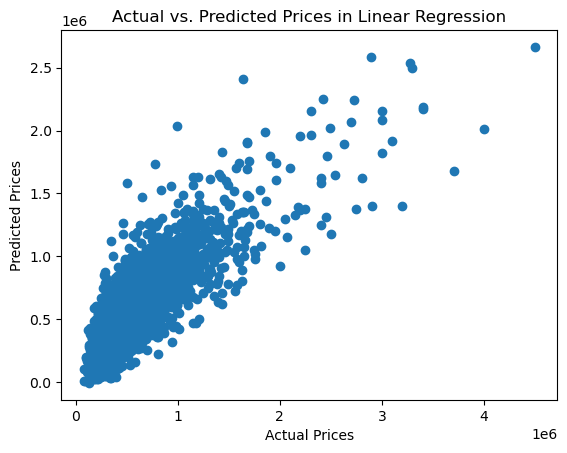

In [168]:
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices in Linear Regression')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


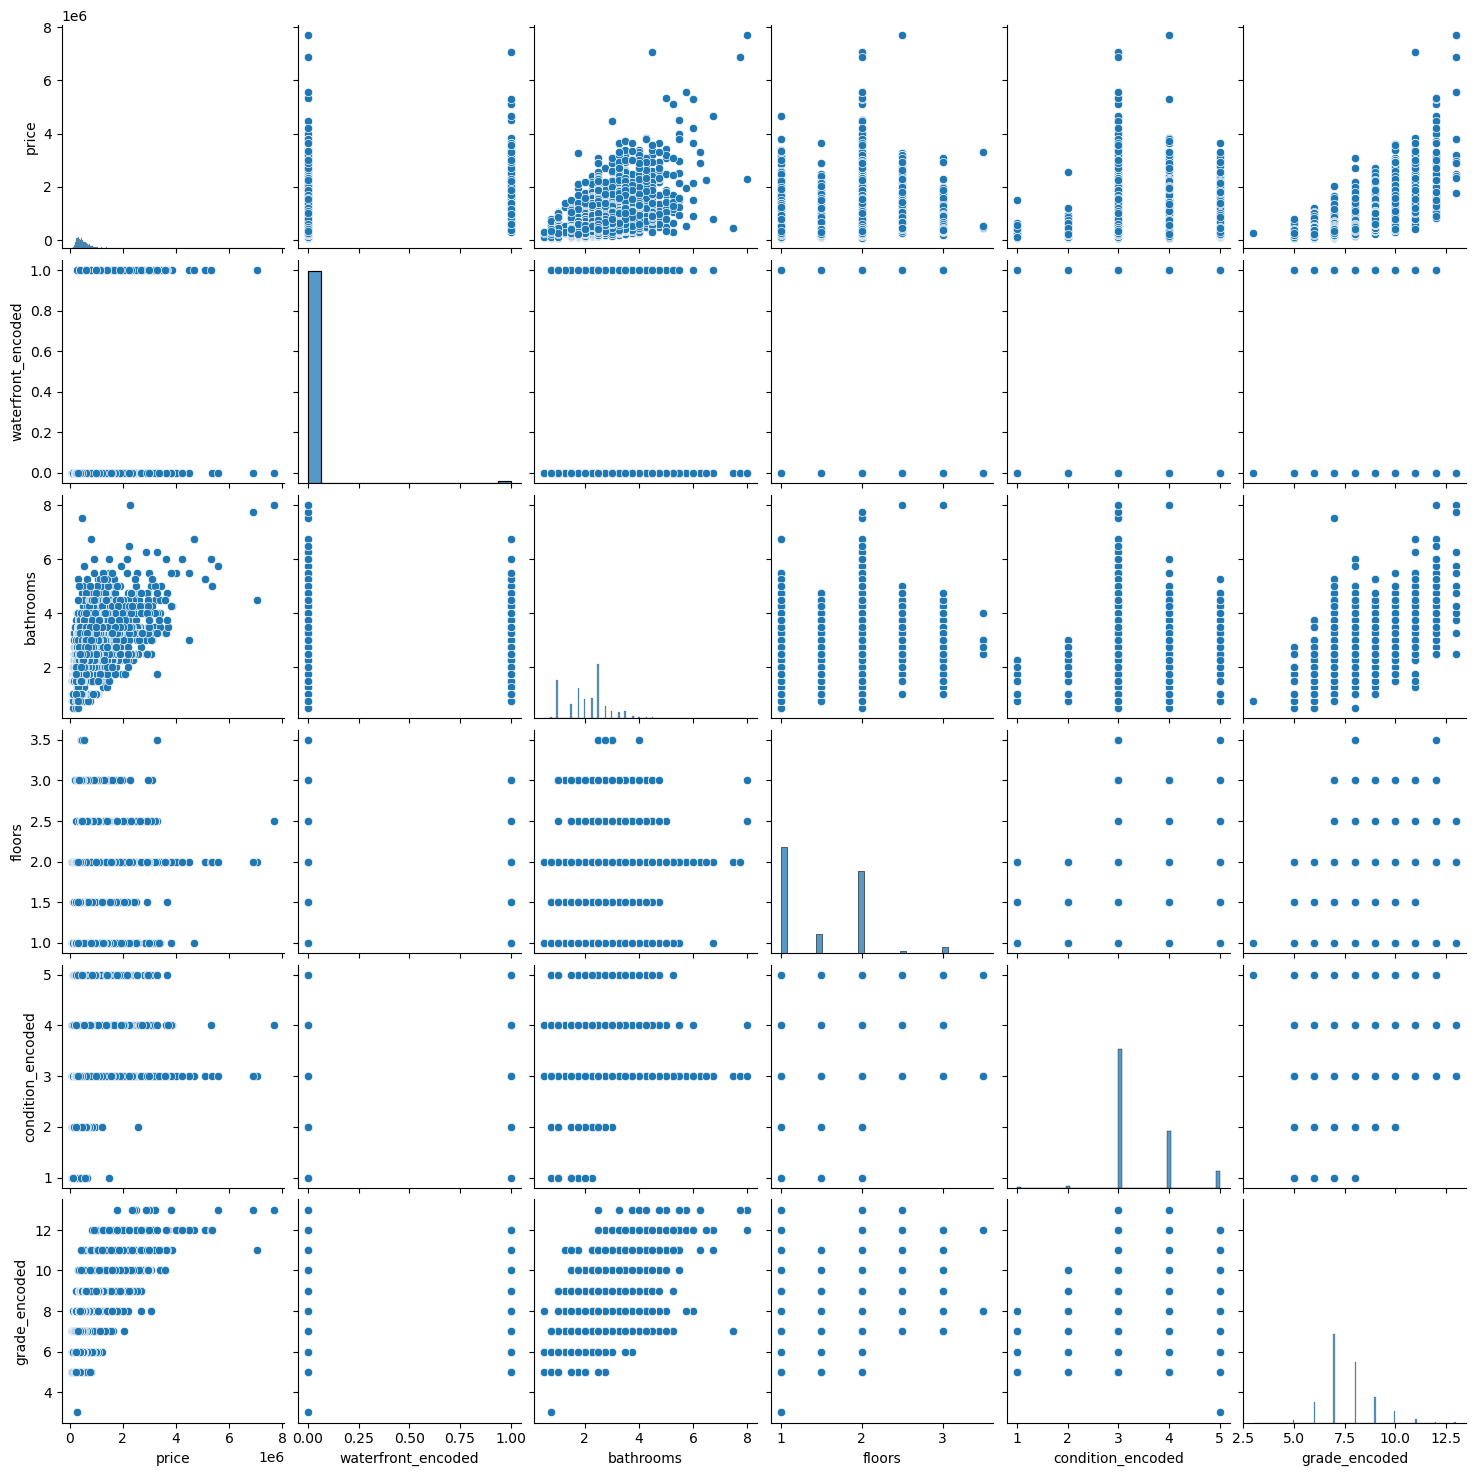

In [169]:
selected_columns = ['price', 'waterfront_encoded', 'bathrooms', 'floors', 'condition_encoded', 'grade_encoded']

# Creating a DataFrame with the selected columns
selected_data = data1[selected_columns]

# Pairplot to visualize relationships
sns.pairplot(selected_data)
plt.show()

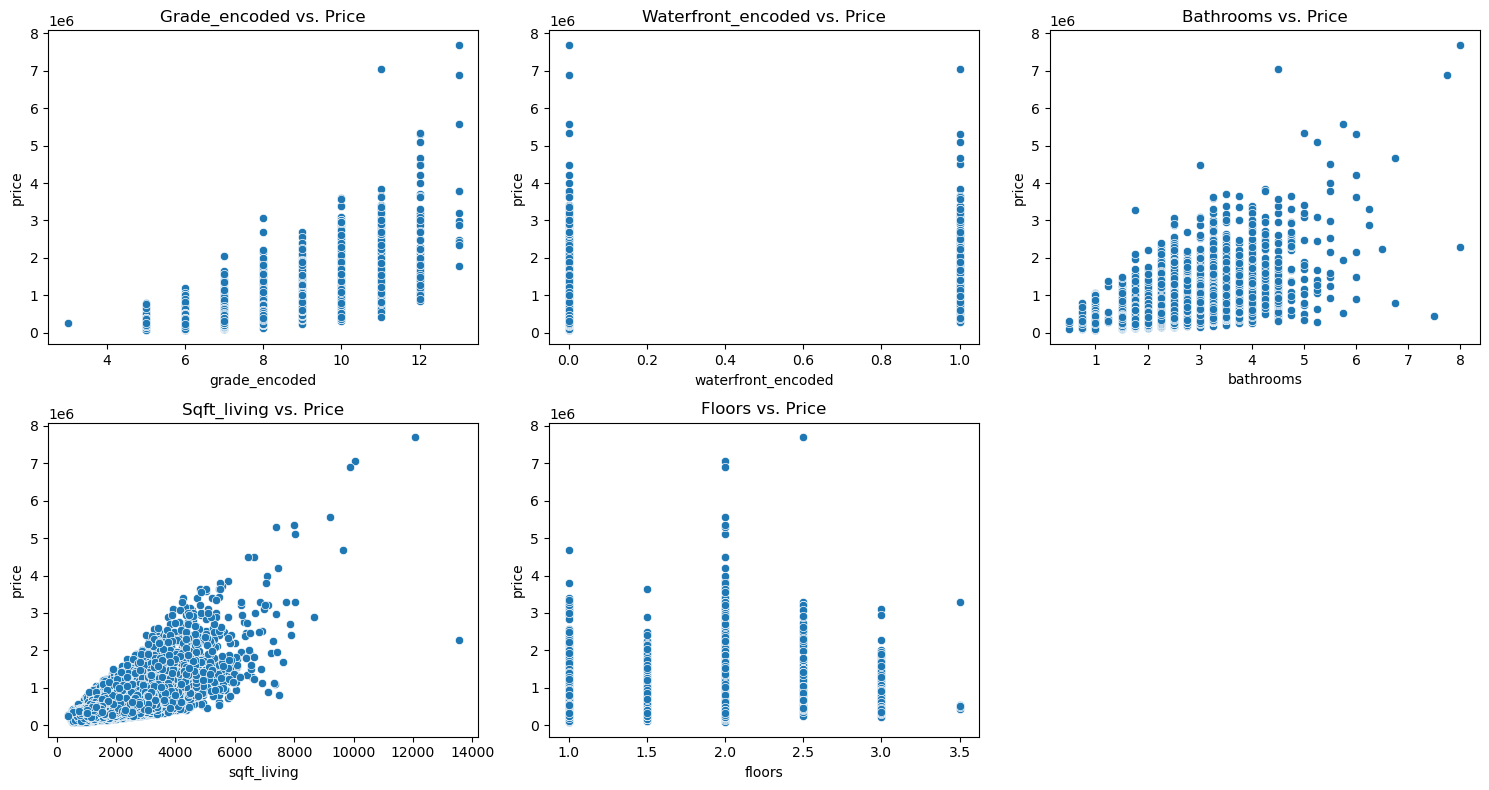

<Figure size 640x480 with 0 Axes>

In [170]:
# Price against top five independent variables with a positive coefficients 
key_features = ['grade_encoded', 'waterfront_encoded', 'bathrooms', 'sqft_living', 'floors']

# Plotting relationships with the target variable
plt.figure(figsize=(15, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data1[feature], y=data1['price'])
    plt.title(f'{feature.capitalize()} vs. Price')

plt.tight_layout()
plt.show()
plt.savefig('realtionship variable graph')

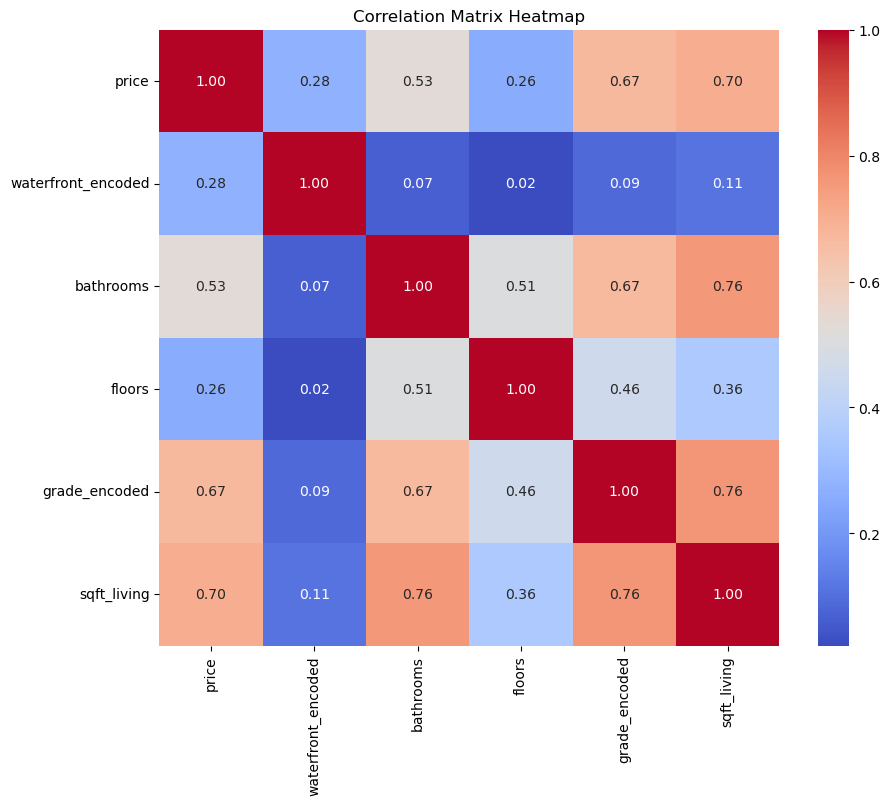

In [177]:
# Heatmap to show correlation between the dependent and independent variables
# Selecting the columns of interest
selected_columns = ['price', 'waterfront_encoded', 'bathrooms', 'floors', 'grade_encoded','sqft_living']

# Creating a DataFrame with the selected columns
selected_data = data1[selected_columns]

# Correlation Matrix Heatmap
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



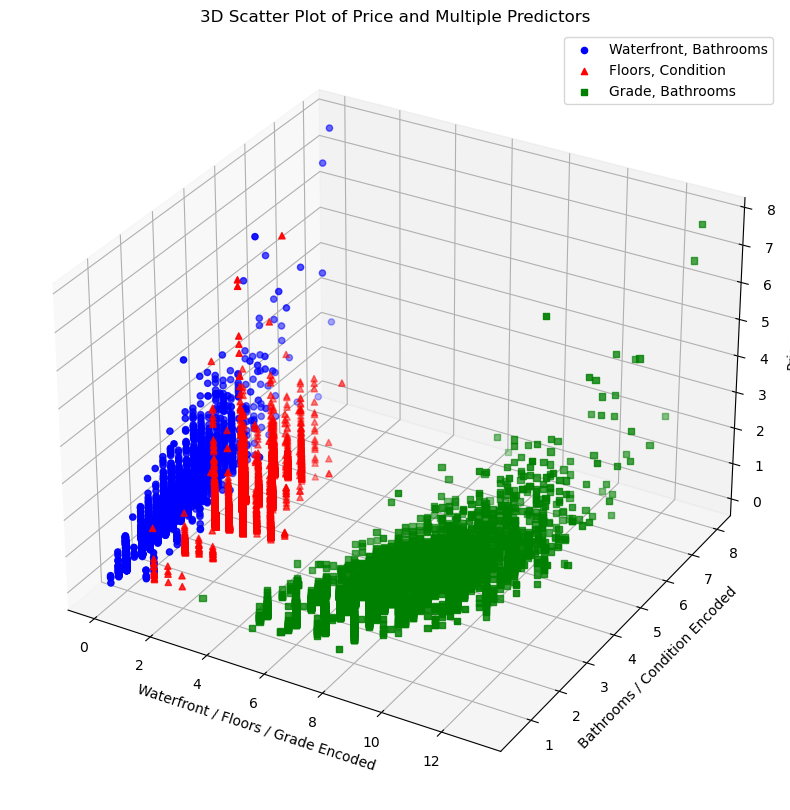

In [172]:
# 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(selected_data['waterfront_encoded'], selected_data['bathrooms'], selected_data['price'], c='blue', marker='o', label='Waterfront, Bathrooms')
ax.scatter(selected_data['floors'], selected_data['condition_encoded'], selected_data['price'], c='red', marker='^', label='Floors, Condition')
ax.scatter(selected_data['grade_encoded'], selected_data['bathrooms'], selected_data['price'], c='green', marker='s', label='Grade, Bathrooms')

ax.set_xlabel('Waterfront / Floors / Grade Encoded')
ax.set_ylabel('Bathrooms / Condition Encoded')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot of Price and Multiple Predictors')
ax.legend()

plt.show()

# Residue calculations

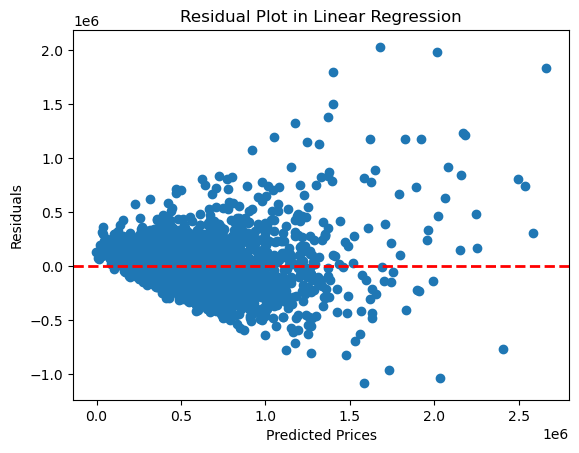

In [173]:
residuals = y_test - y_pred

# Create a scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot in Linear Regression')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Adding a horizontal line at y=0 for reference
plt.show()

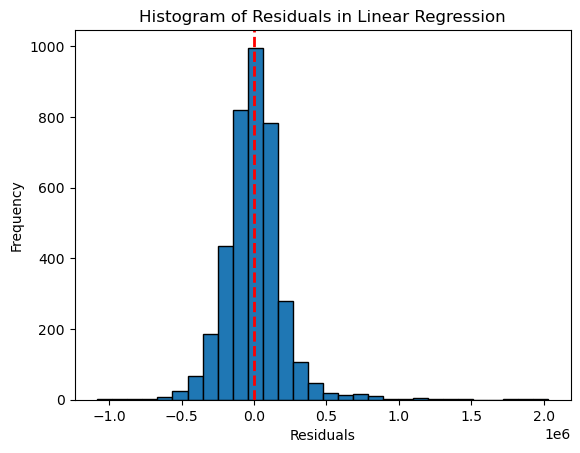

In [174]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals in Linear Regression')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)  # Adding a vertical line at x=0 for reference
plt.show()

The residuals are normally distributed therefore the model prediction is unbiased

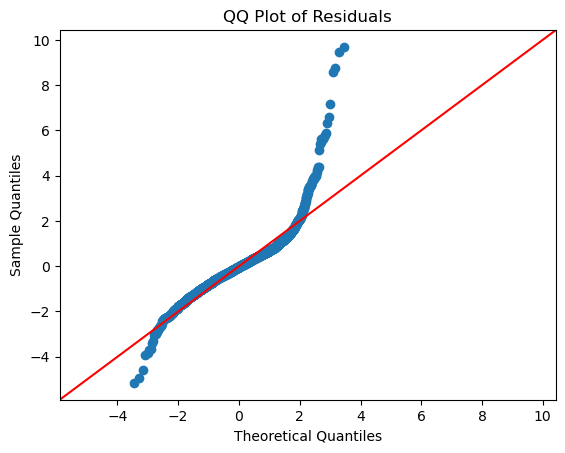

In [176]:
# QQ plot to test normality of the residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

###  Results Summary
The estimated value of a house is 6.7 million while holding all other variables constant.
The R-squared explains approximately 65% of variance in the dependent variable (price) that is explained by the independent variables.The R-squared suggests that the model is able to capture a significant portion of the variability in home prices.
Based on coefficient of the coefficient model an increase of one bathroom will increase the estimated value  by 50,430 USD
An increase of one bedroom will decrease the estimated value by 42,820 USD.
The pvalues are low all below 0.05 and this shows the model is statistically siginificant


## Recomendations.
Based on the model we have established that houses with the following features tend to 
have a higher value;

grade_encoded - the higher a house is graded the higher its price. an upgrade to the next grade will increase the estimated value by 13,010 USD.

waterfront_encoded - A house with a waterfront increases the estimated value of the house by 75,150 USD.

bathrooms - An increase of one bathroom will increase the estimated value by 50,430 USD

sqft_living - An increase in the sqft_living of a home will increase the estimated value by 180 USD per sqft

floors - An increase in one floor of a house subsequently increases the estimated value by 21,650 USD




# Box plot kindly assist in interpretation

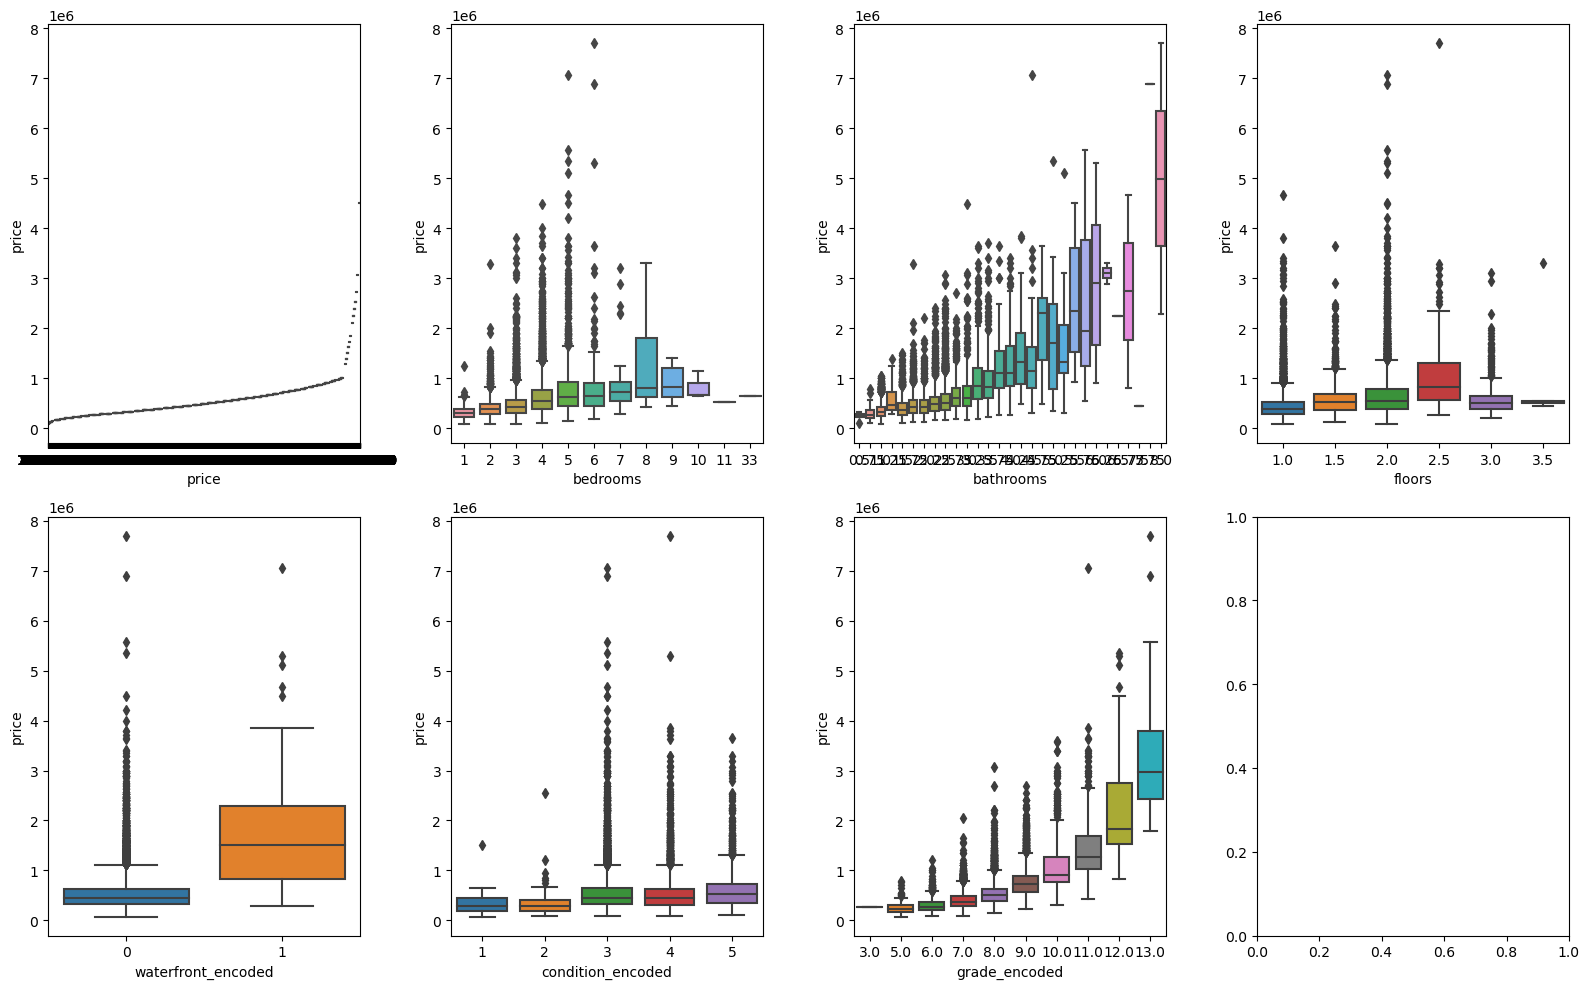

In [178]:
# Selecting relevant columns
selected_columns = ['price','bedrooms', 'bathrooms',  'floors', 'waterfront_encoded', 'condition_encoded', 'grade_encoded']

# Creating a DataFrame with selected columns
selected_data = data1[selected_columns]

# Creating boxplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))

for i, col in enumerate(selected_columns):
    sns.boxplot(x=col, y='price', data=selected_data, ax=axes[i//4, i%4])

plt.tight_layout()
plt.show()